# Explore RNAseq of zebrafish photoreceptors 
### [Transcription factors underlying photoreceptor diversity, Angueyra et al. eLife 2023;12:e81579](https://doi.org/10.7554/eLife.81579)

This notebook can be accessed here:  
[angueyraLab.github.io/drRNAseq/lab](angueyra.github.io/drRNAseq/lab)  

## Follow instructions below to explore dataset openly available at: https://github.com/angueyraLab/drRNAseq.  
AND  
## Make comparisons with published RNAseq datasets containing zebrafish adult photoreceptors, including:  
- [Ogawa and Corbo (2021)](https://doi.org/10.1038/s41598-021-96837-z): FACS + 10x from adult rods, cones and bipolar cells  
- [Hoang _et al._ (2020)](https://doi.org/10.1126/science.abb8598): 10x from whole retina (extracted data from adult photoreceptors and reclustered)  
- [Sun, Galicia and Stenkamp (2018)](https://doi.org/10.1186/s12864-018-4499-y): FACS + bulk RNAseq from adult rods (GFP+) and other retinal cells (GFP-)  
----
----

### How to use the notebook
- To explore the datasets, you will need to run the code in the cells below.  
- To run a cell, you need to click unto it to select it and press "Ctrl"+"Enter" or the small *play* symbol in the navigation bar on top of this notebook.  
- Cells that are currently running display [\*] on the left.  
- Cells that have finished running will display a number instead (e.g.[8])
---
---
#### Saving plots:
- Right click on the image and click on "Create New View for Output"
- Right click on image in Output View panel and click on "Save As..."

#### First: load python environment

In [1]:
import pyodide_kernel
print("Successfully loaded pyolite version {0}".format(pyodide_kernel.__version__))

Successfully loaded pyolite version 0.1.3


#### Second: load all necessary extensions (this may take a few minutes...)

In [2]:
print("Loading extensions...")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from scipy.stats import zscore
import os
import pyodide
import piplite

# Load plotting function
URL = 'https://raw.githubusercontent.com/angueyraLab/drRNAseq/main/content/juanPlot-0a3-py2.py3-none-any.whl'
await piplite.install(URL)
from juanPlot import *
print("Successfully loaded extensions!")


# load datasets
print("Loading datasets...")
gf = pd.read_csv('./data/Angueyra2021_Photoreceptors.csv')
print("\t Angueyra et al. (2022)")

zfO = pd.read_csv('./data/Ogawa2021_10x_photoreceptors.csv')
print("\t Ogawa and Corbo (2021)")

zfH = pd.read_csv('./data/Hoang2020_10x_photoreceptors.csv')
print("\t Hoang et al. (2020)")

zfS = pd.read_csv('./data/Sun2018_FACS_Rods.csv')
print("\t Sun, Galicia, Stenkamp (2018)")

print("Successfully loaded datasets!\n\n")


Loading extensions...
Successfully loaded extensions!
Loading datasets...
	 Angueyra et al. (2022)
	 Ogawa and Corbo (2021)
	 Hoang et al. (2020)
	 Sun, Galicia, Stenkamp (2018)
Successfully loaded datasets!




#### Define some plotting bases and colors

In [3]:
plotStyle = 'Light'
# plotStyle = 'Dark'

heatmapNormalization = True
heatmapNormalization = False

# photoreceptor Colors
pC = {
    'r' : '#747474', # Rods
    'u' : '#B540B7', # UV cones
    's' : '#4669F2', # S cones
    'm' : '#04CD22', # M cones
    'l' : '#CC2C2A', # L cones
    'm4': '#cdcd04', # opn1mws4-expressing M cones
    'onBC': '#ccf2ff', # on bipolar cells
    'offBC': '#663d00', # off bipolar cells
    'plt' : '',
    'zfO': '',
}

# default parameters for plotting
if plotStyle=='Dark':
    # dark background
    plt.style.use('dark_background')
    params = {"ytick.color" : "w", "xtick.color" : "w",
              "axes.labelcolor" : "w", "axes.edgecolor" : "w",
             "axes.linewidth" : 3,
             "xtick.major.width" : 3, "ytick.major.width" : 3,
             "xtick.major.size" : 8, "ytick.major.size" : 8,
             "text.color" : "w"}
    plt.rcParams.update(params)
    baseColor = '#ffffff' #white
else:
    # white background
    plt.style.use('default')
    params = {"ytick.color" : "k", "xtick.color" : "k",
              "axes.labelcolor" : "k", "axes.edgecolor" : "k",
             "axes.linewidth" : 3,
             "xtick.major.width" : 3, "ytick.major.width" : 3,
             "xtick.major.size" : 8, "ytick.major.size" : 8,
             "text.color" : "k"}
    plt.rcParams.update(params)
    baseColor = '#000000' #black
    


print("Plotting style is: {0}".format(plotStyle))

Plotting style is: Light


***
# Index <a id='Index'></a>
- [Bar plot for single gene: Angueyra et al. (2022)](#barPlot)
- [heatMap for gene family: Angueyra et al. (2021)](#heatMap)
- [heatMap for gene list: Angueyra et al. (2021)](#heatMapList)
- [Bar plot for single gene: across studies](#barPlot_otherStudies)
- [heatMap for gene family: across studies](#heatMap_otherStudies)
- [heatMap for gene list: across studies](#heatMapList_otherStudies)

***
## Bar plot for single gene: provide gene symbol (e.g. '_tbx2a_')<a id='barPlot'></a>
***
[Back to Index](#Index)

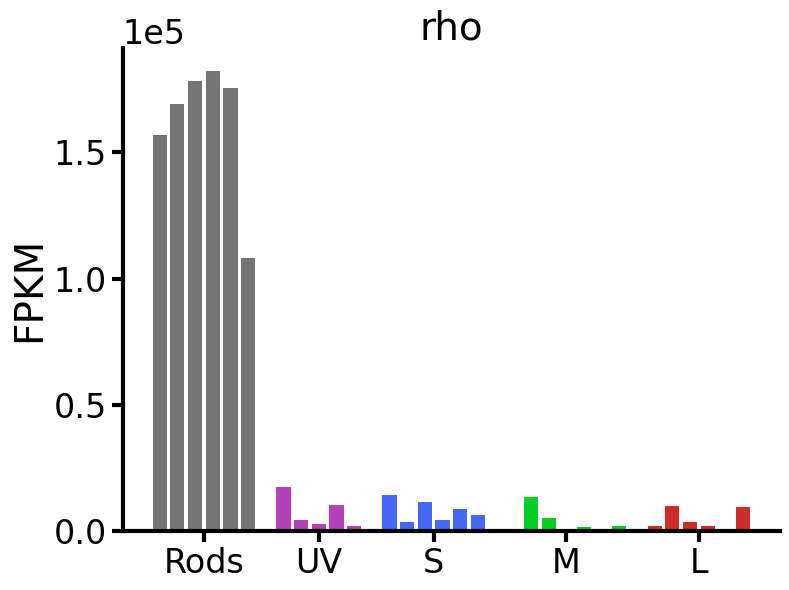

In [4]:
geneSymbol = 'rho' # replace geneSymbol here and rerun cell to replot

barData = gf[gf['symbol']==geneSymbol] #get data (should add a check here with isin)
fH, axH = plt.subplots(figsize=(8,6))
pH = plotBars(barData, geneSymbol, ax=axH, pC=pC)
plt.subplots_adjust(left=0.15, right=.95, top=0.90, bottom=0.1)
plt.tight_layout()
plt.show()

***
## HeatMap for gene family: provide gene symbol prefix (e.g. '_opn1_')<a id='heatMap'></a>
> retrieves all genes whose symbol starts with defined geneSymbol  
***

[Back to Index](#Index)

In [6]:
# display option for heatmap normalization
heatmapNormalization = True

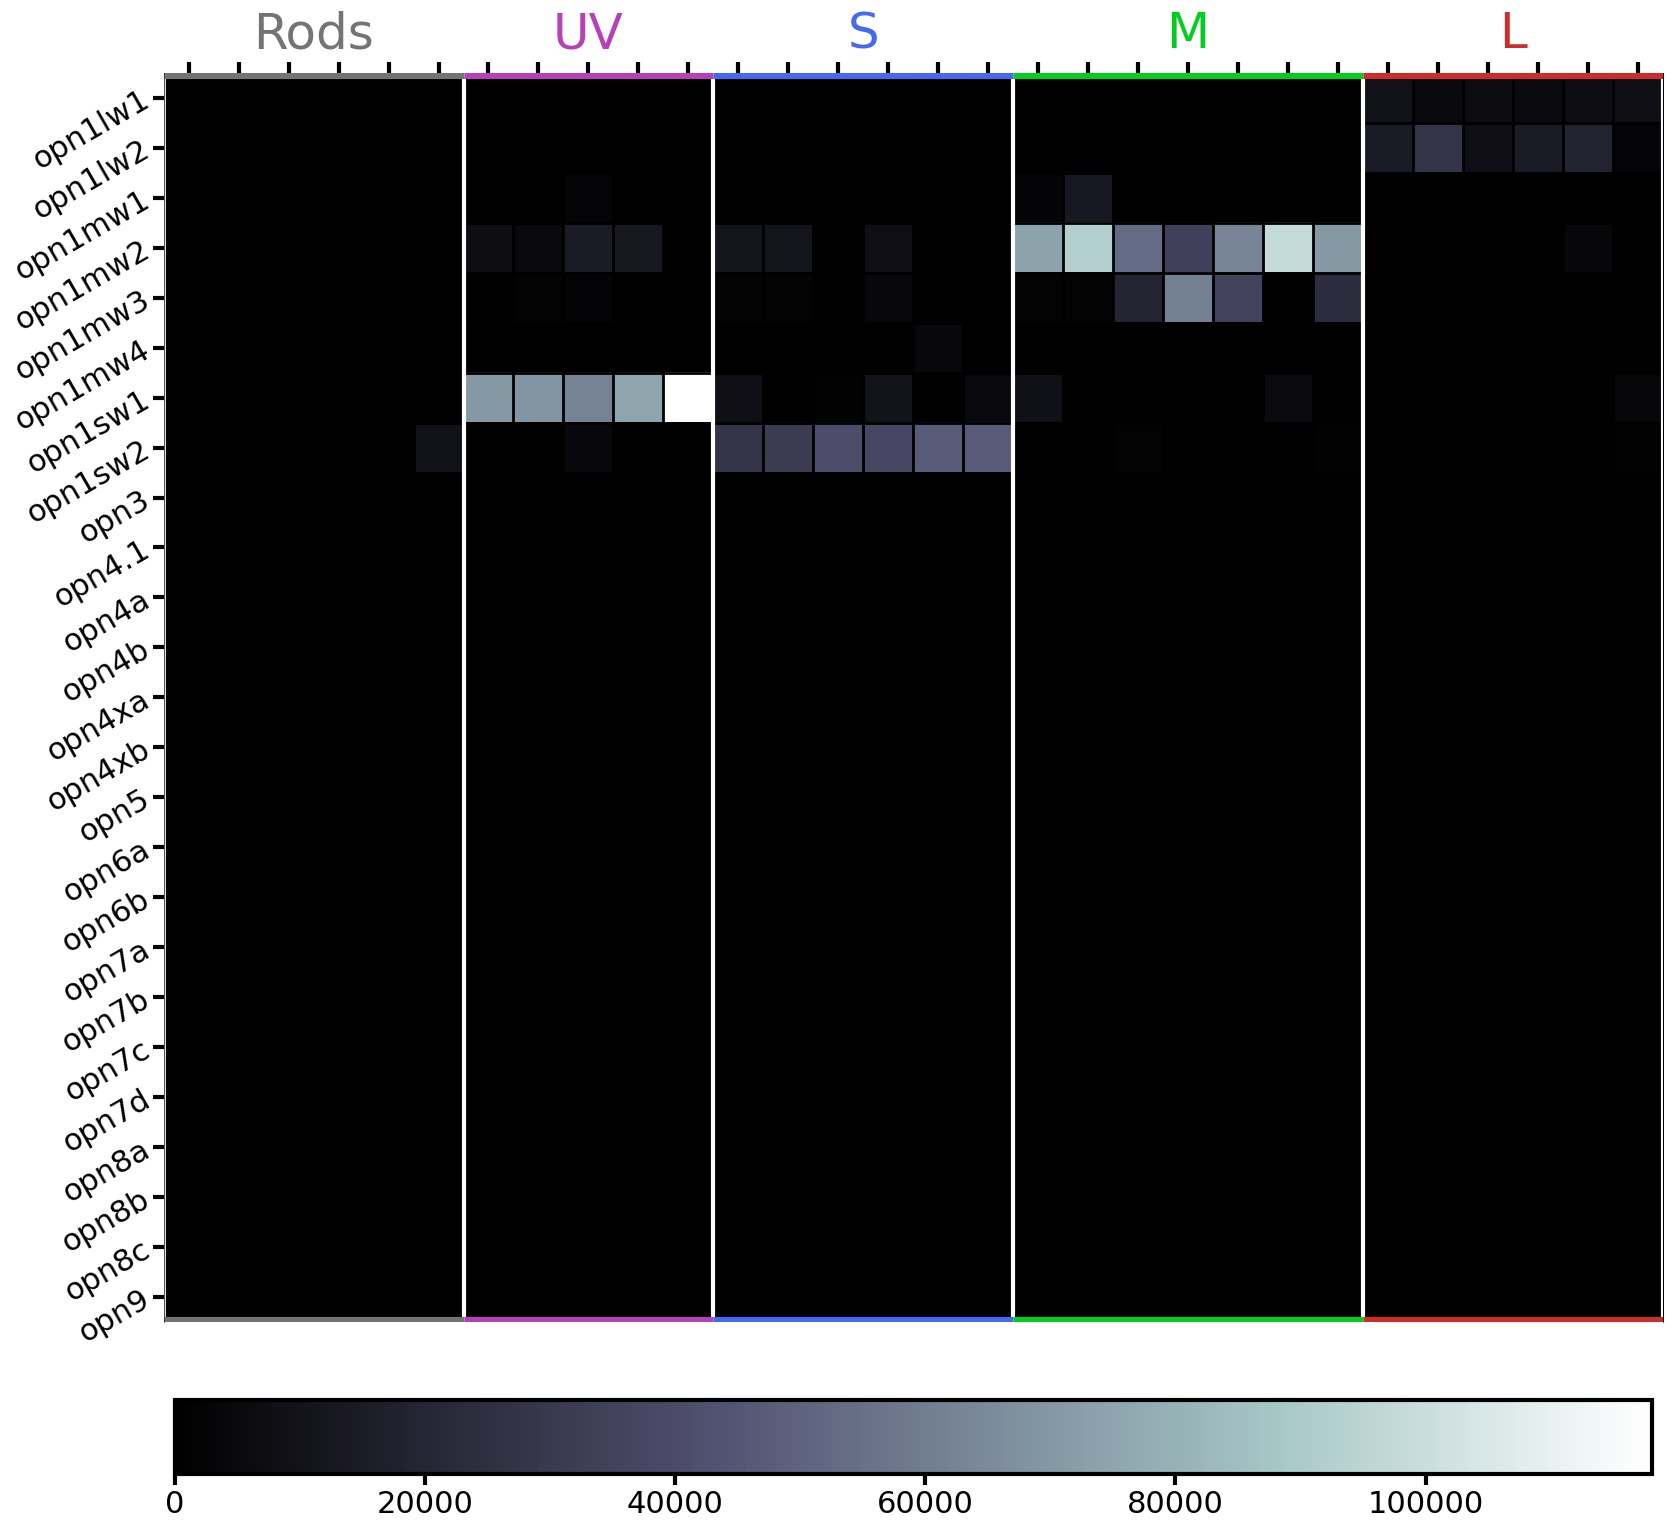

In [5]:
geneSymbol='opn' # replace geneSymbol here and rerun cell to replot

heatmapData = gf[gf['symbol'].str.startswith(geneSymbol)]
heatmapData = heatmapData.sort_values(by=["symbol"])
fH, axH = plt.subplots(figsize=(20,(0.5*heatmapData.shape[0])+4))
hmH, cbH = heatmap(heatmapData, pC = pC, norm=heatmapNormalization)
plt.tight_layout()
plt.show()

***
## HeatMap for gene list: provide gene symbols separated by "|" (e.g. '_tbx2a_|_tbx2b_|_foxq2_')<a id='heatMapList'></a>
> retrieves all genes in list and creates heatmap  
***

[Back to Index](#Index)

In [7]:
# display option for heatmap normalization
heatmapNormalization = True

Checkbox(value=False, description='Heatmap normalization')

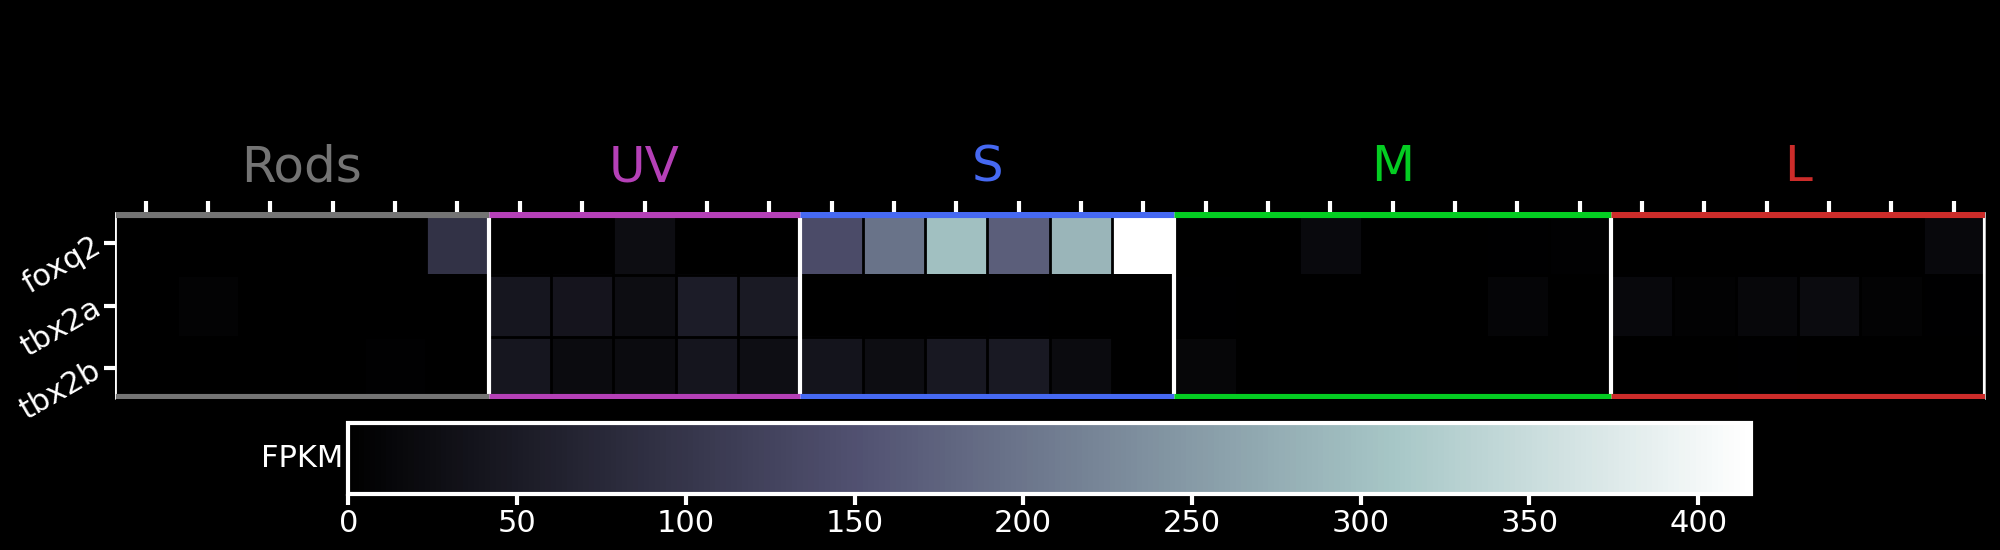

In [8]:
geneSymbol='tbx2a|tbx2b|foxq2' # replace geneSymbol here and rerun cell to replot

heatmapData = gf[gf['symbol'].str.contains(geneSymbol)]
heatmapData = heatmapData.sort_values(by=["symbol"])
fH, axH = plt.subplots(figsize=(20,(0.5*heatmapData.shape[0])+4))
hmH, cbH = heatmap(heatmapData, pC = pC, norm=heatmapNormalization)
plt.tight_layout()
plt.show()

***
## Bar plots for single gene across studies: provide gene symbol (e.g. '_foxq2_')<a id='barPlot_otherStudies'></a>
***
[Back to Index](#Index)

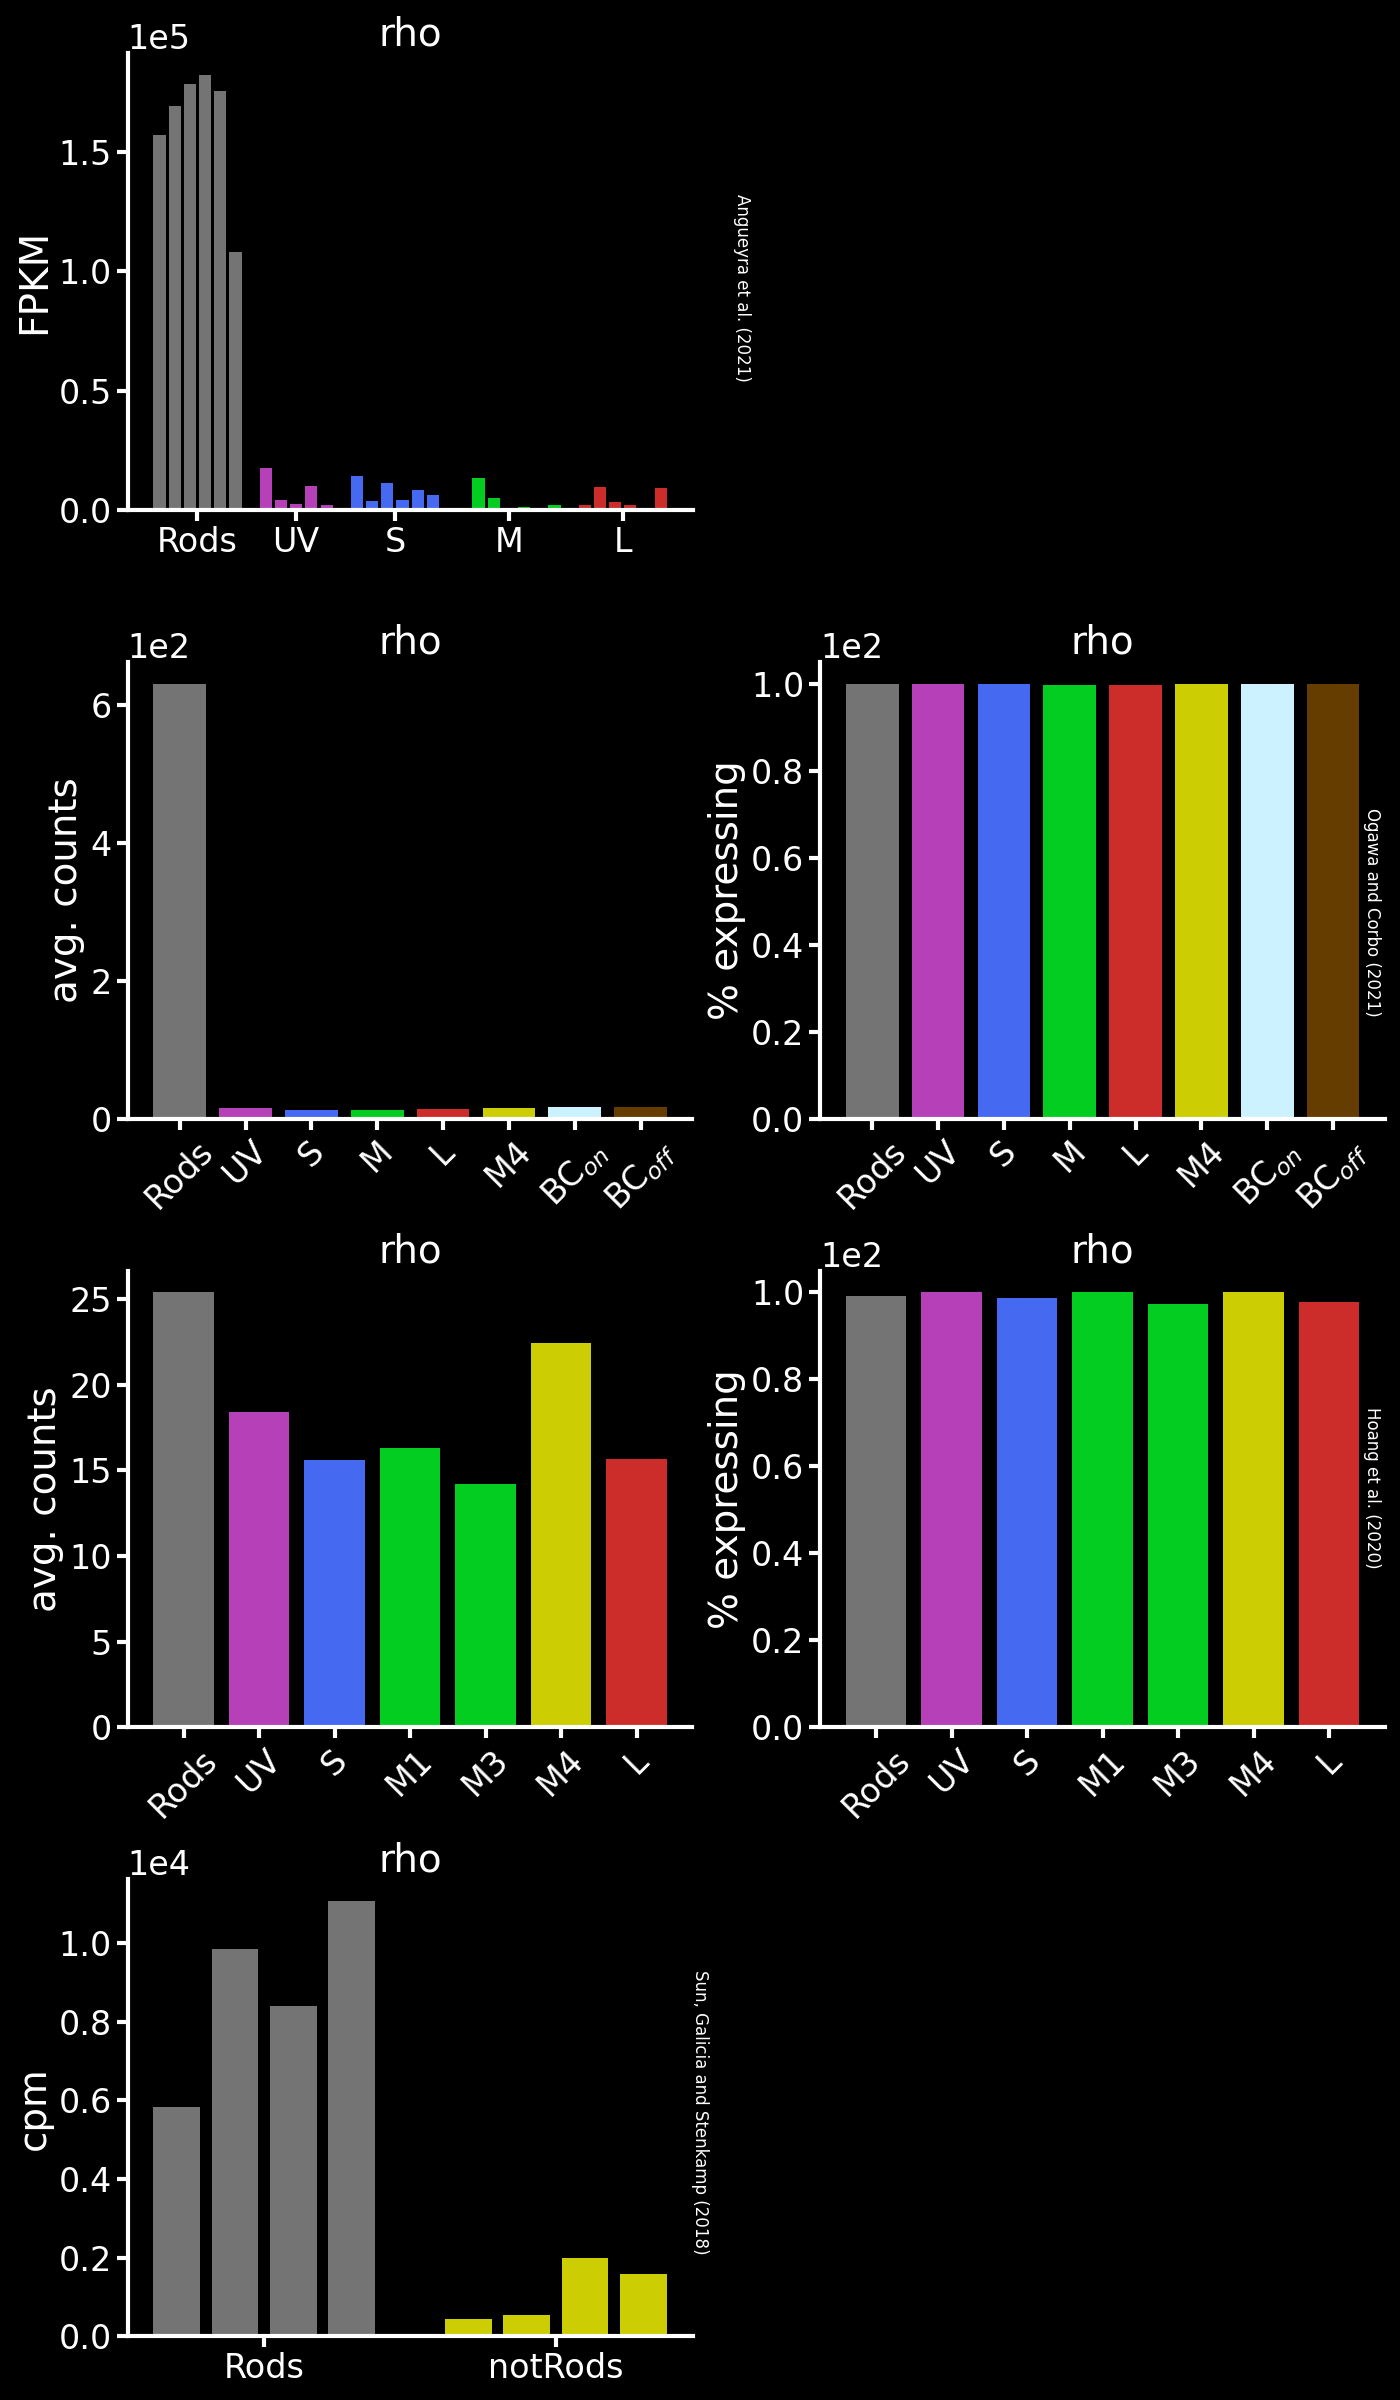

In [9]:
geneSymbol = 'rho' # replace geneSymbol here and rerun cell to replot

barData = gf[gf['symbol']==geneSymbol] # get data
barDataO = zfO[zfO['symbol']==geneSymbol] #get data
barDataH = zfH[zfH['symbol']==geneSymbol] #get data
barDataS = zfS[zfS['symbol']==geneSymbol] #get data
fH, axH = plt.subplots(4,2,figsize=(7*2,6*4))
pH0 = plotBars(barData, geneSymbol, ax=axH[0,0], pC=pC)
plt.figtext(0.53,0.88,"Angueyra et al. (2022)", va="center", ha="center", rotation= 270, size=12)
pH1 = plotBars_Ogawa2021(barDataO, geneSymbol, axH[1,0], pC, pctPlot=False)
pH2 = plotBars_Ogawa2021(barDataO, geneSymbol, axH[1,1], pC, pctPlot=True)
plt.figtext(0.98,0.62,"Ogawa and Corbo (2021)", va="center", ha="center", rotation= 270, size=12)
pH3 = plotBars_Hoang2020(barDataH, geneSymbol, axH[2,0], pC, pctPlot=False)
pH4 = plotBars_Hoang2020(barDataH, geneSymbol, axH[2,1], pC, pctPlot=True)
plt.figtext(0.98,0.38,"Hoang et al. (2020)", va="center", ha="center", rotation= 270, size=12)
pH5 = plotBars_Sun2018(barDataS, geneSymbol, axH[3,0], pC)
axH[0,1].remove()
axH[3,1].remove()
plt.figtext(0.50,0.12,"Sun, Galicia and Stenkamp (2018)", va="center", ha="center", rotation= 270, size=12)
plt.tight_layout()
plt.show()

***
## HeatMap for gene family across studies: provide gene symbol prefix (e.g. '_tbx_')<a id='heatMap_otherStudies'></a>
> retrieves all genes whose symbol starts with defined geneSymbol  
***

[Back to Index](#Index)

In [10]:
# display option for normalization
heatmapNormalization = True

Checkbox(value=False, description='Heatmap normalization')

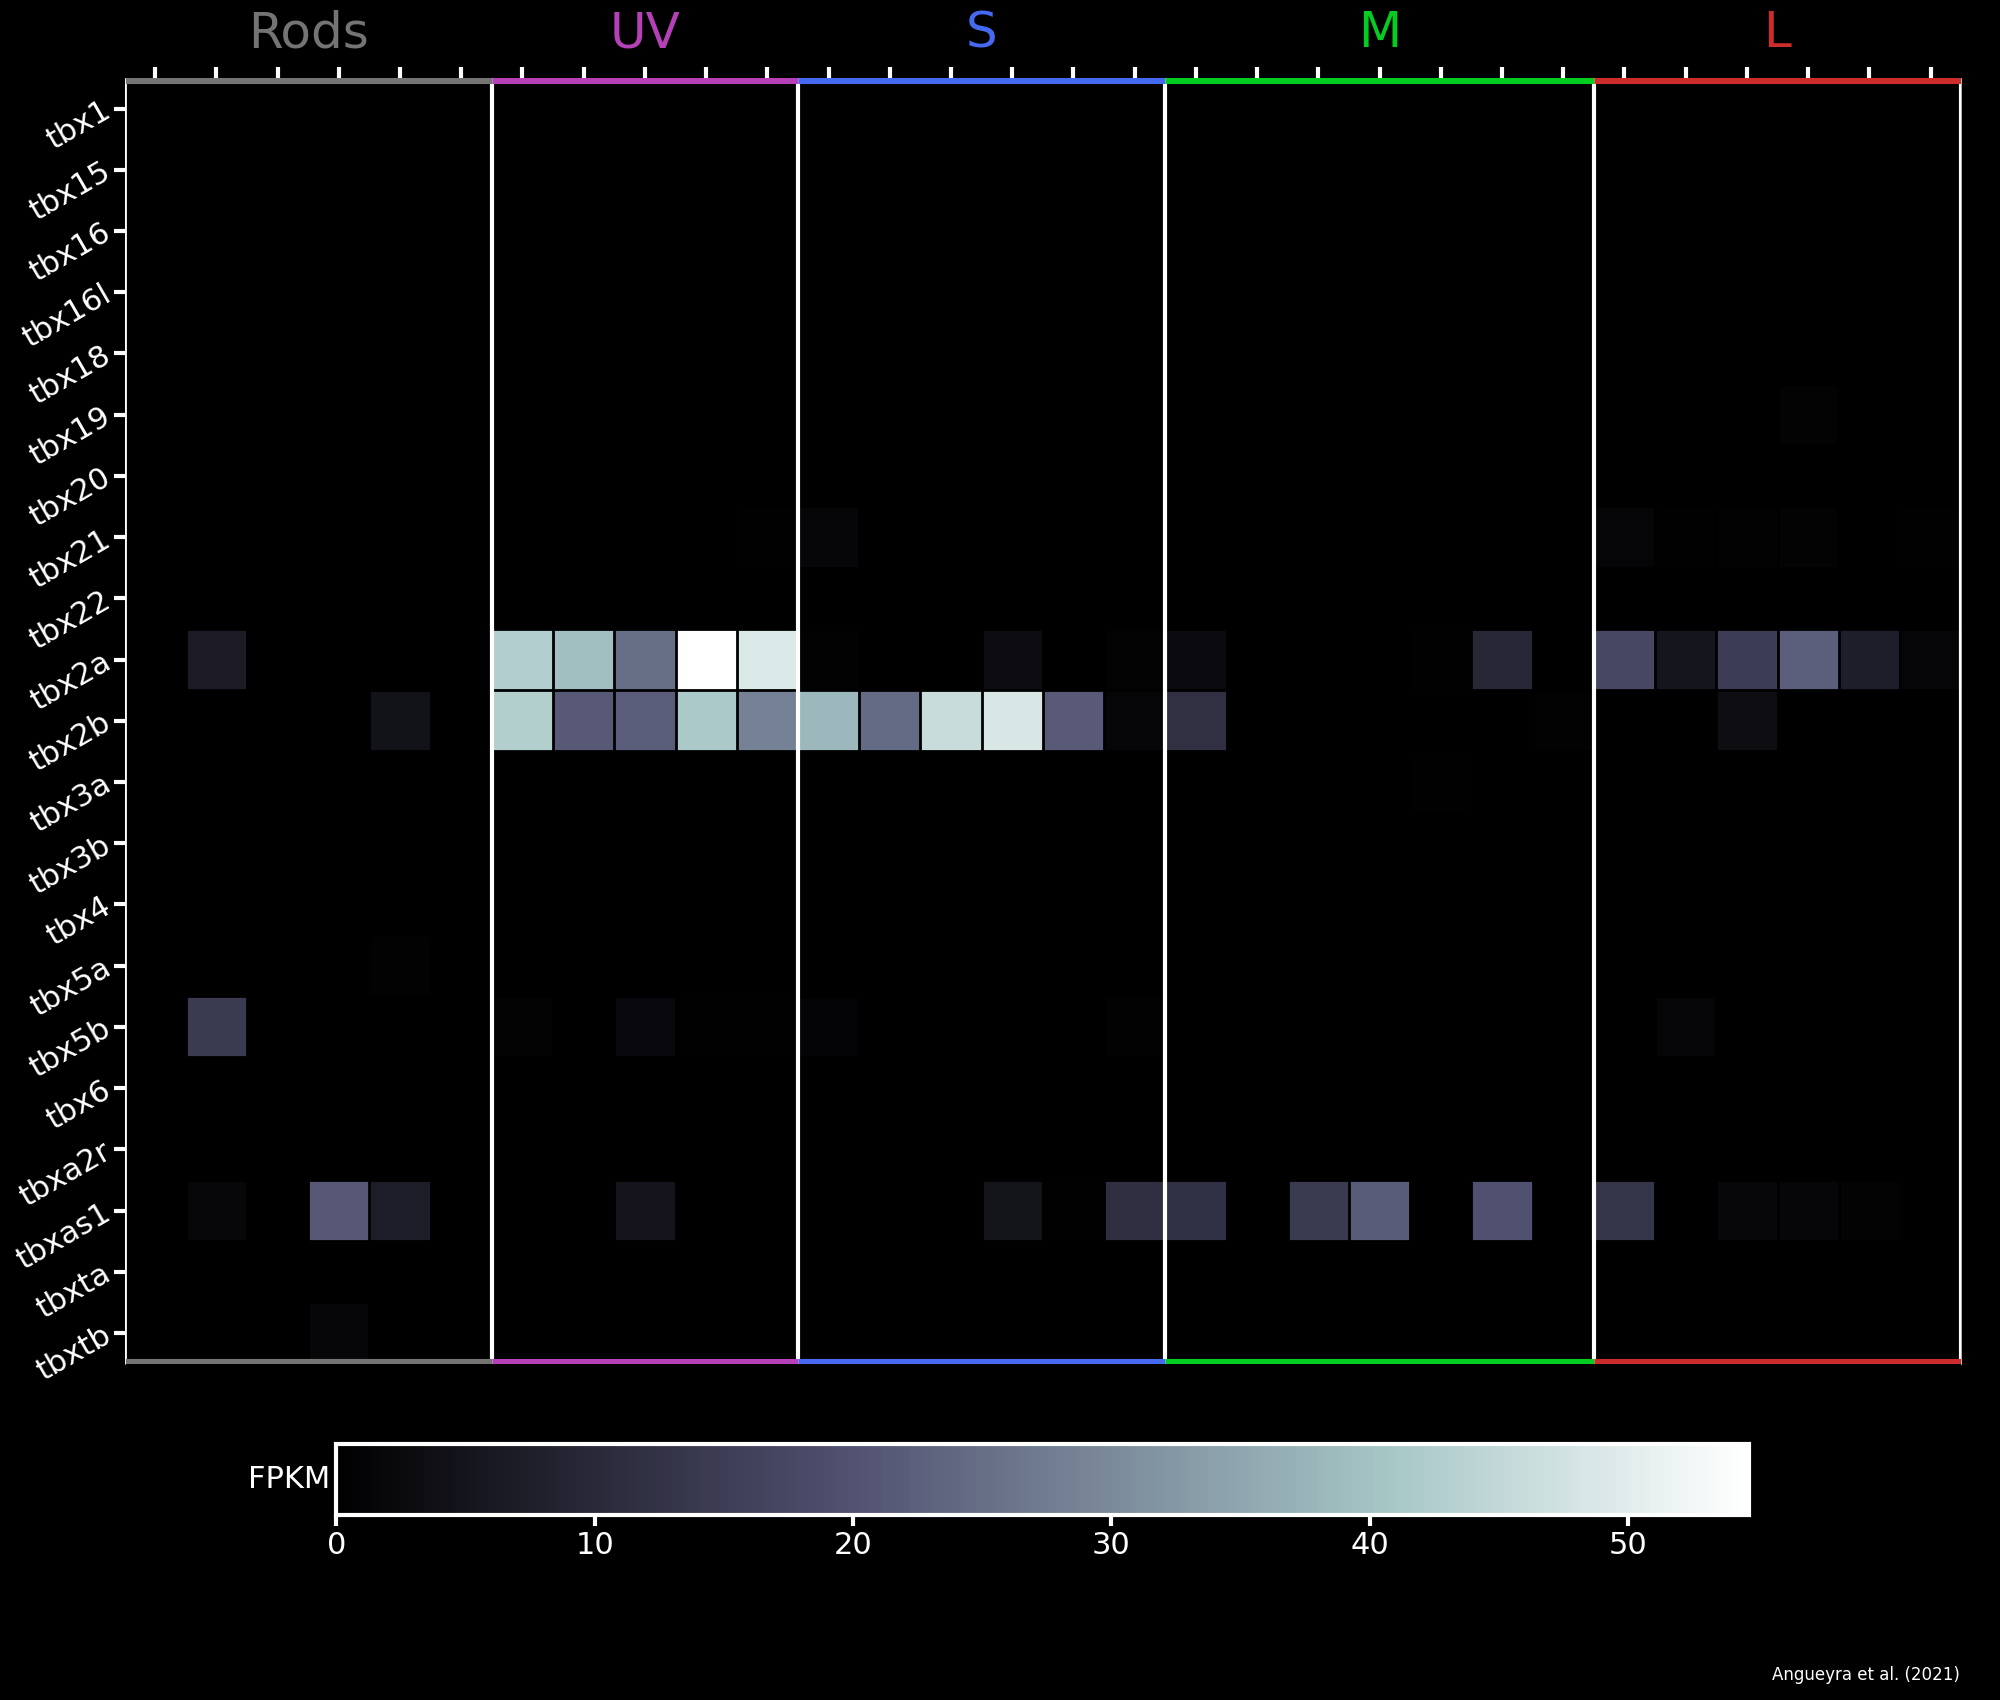

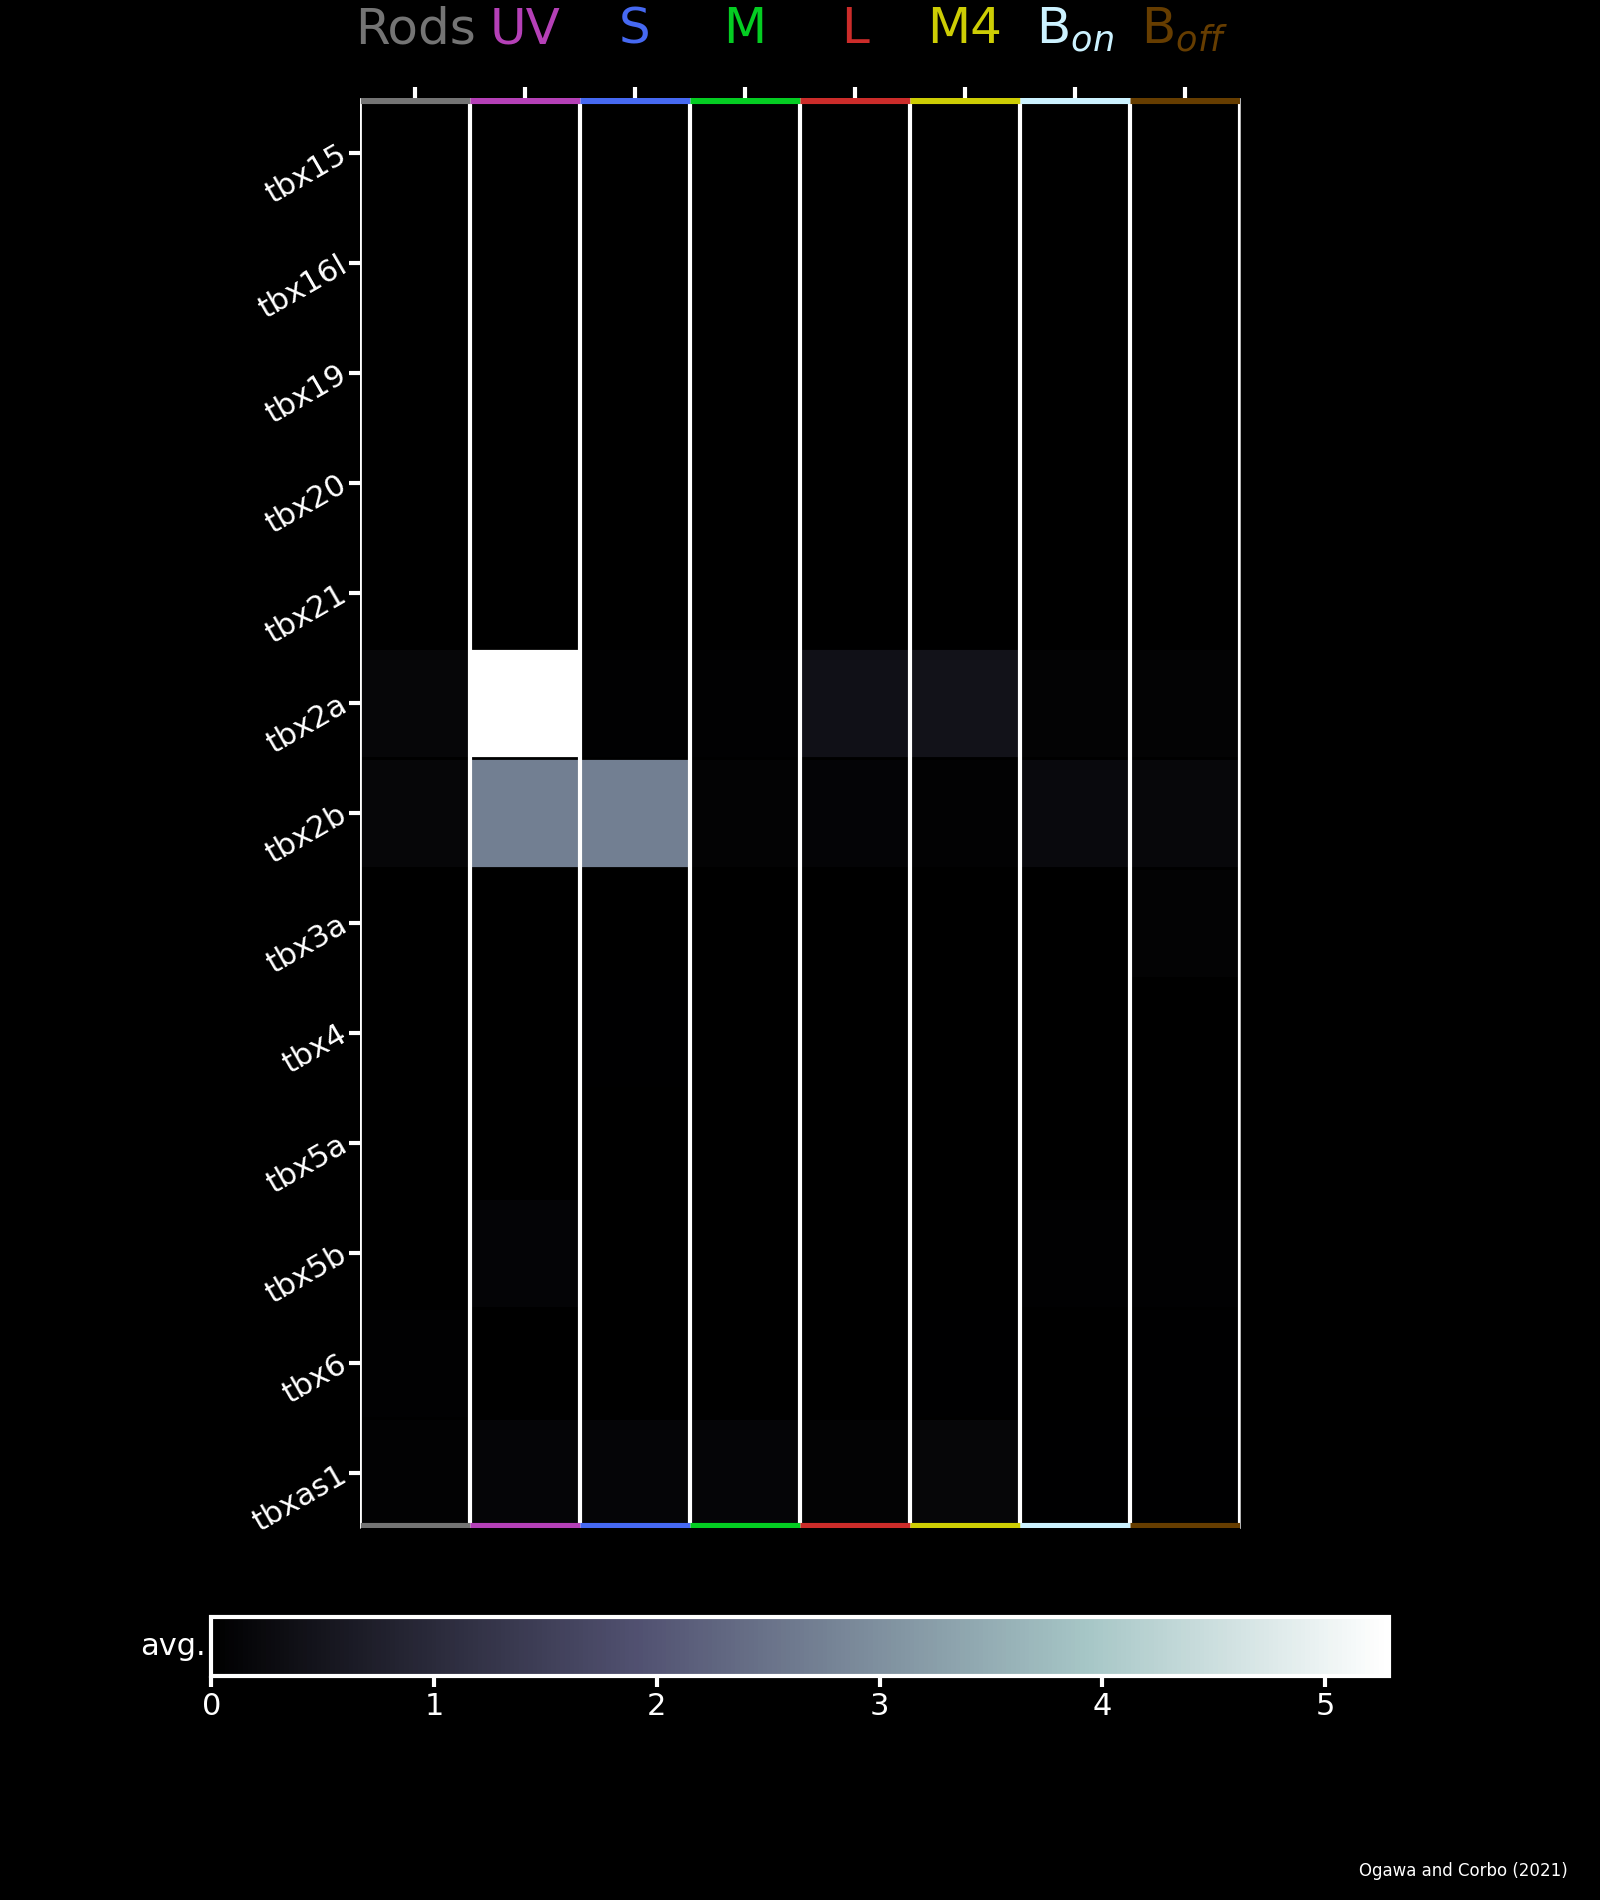

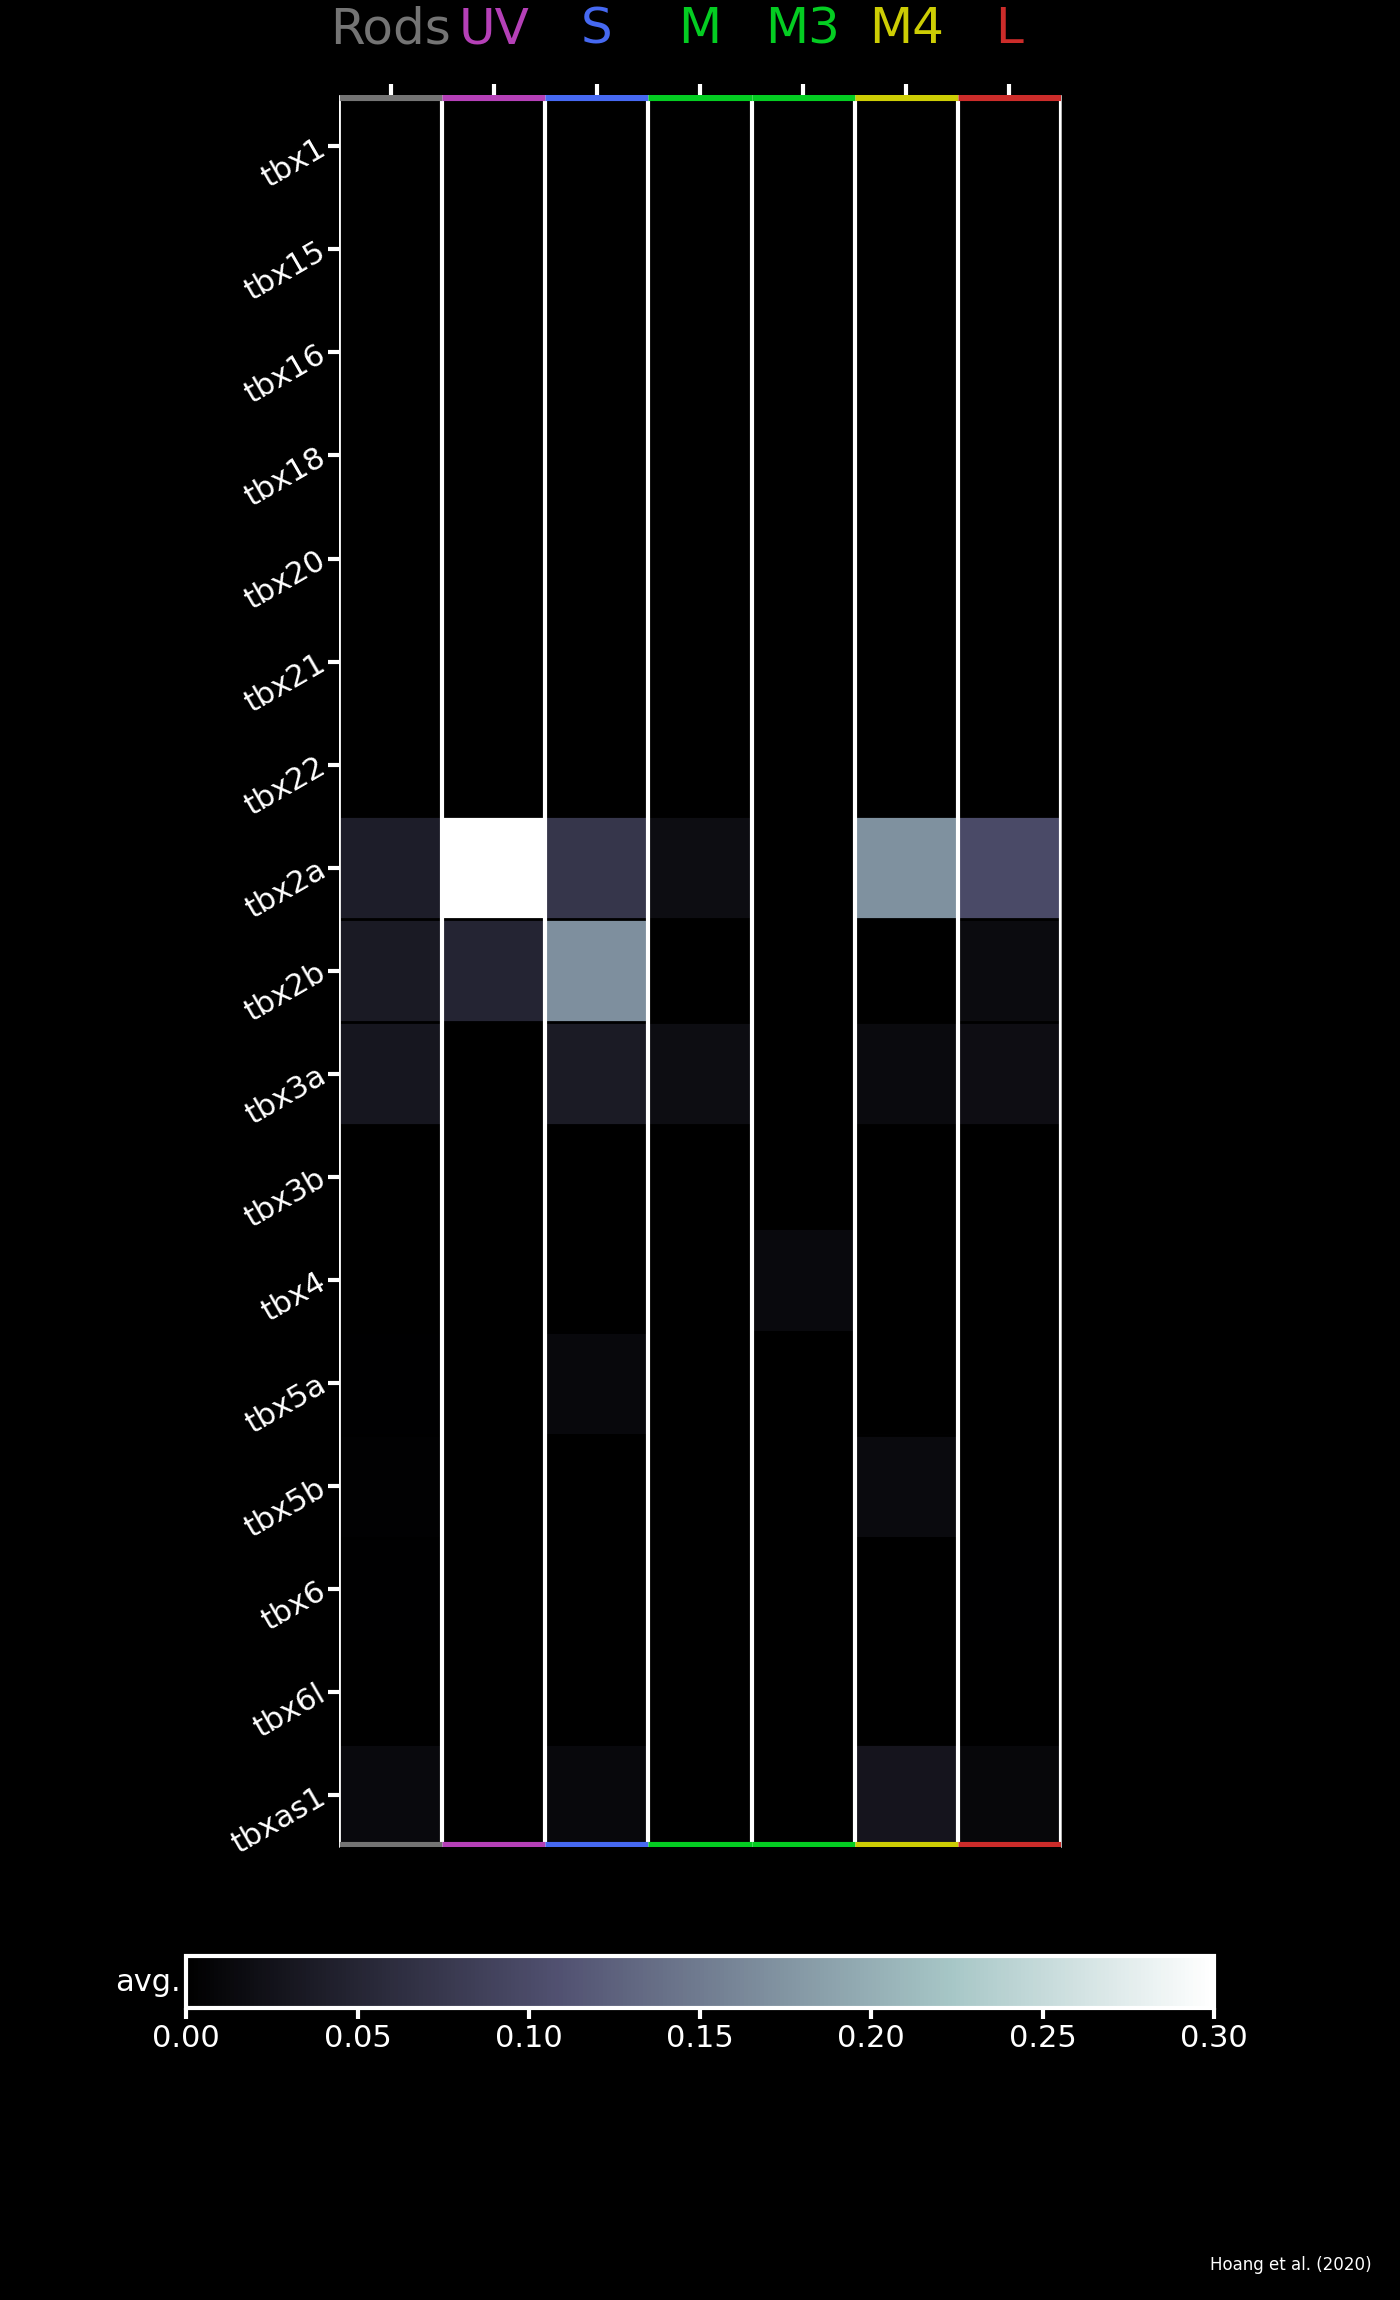

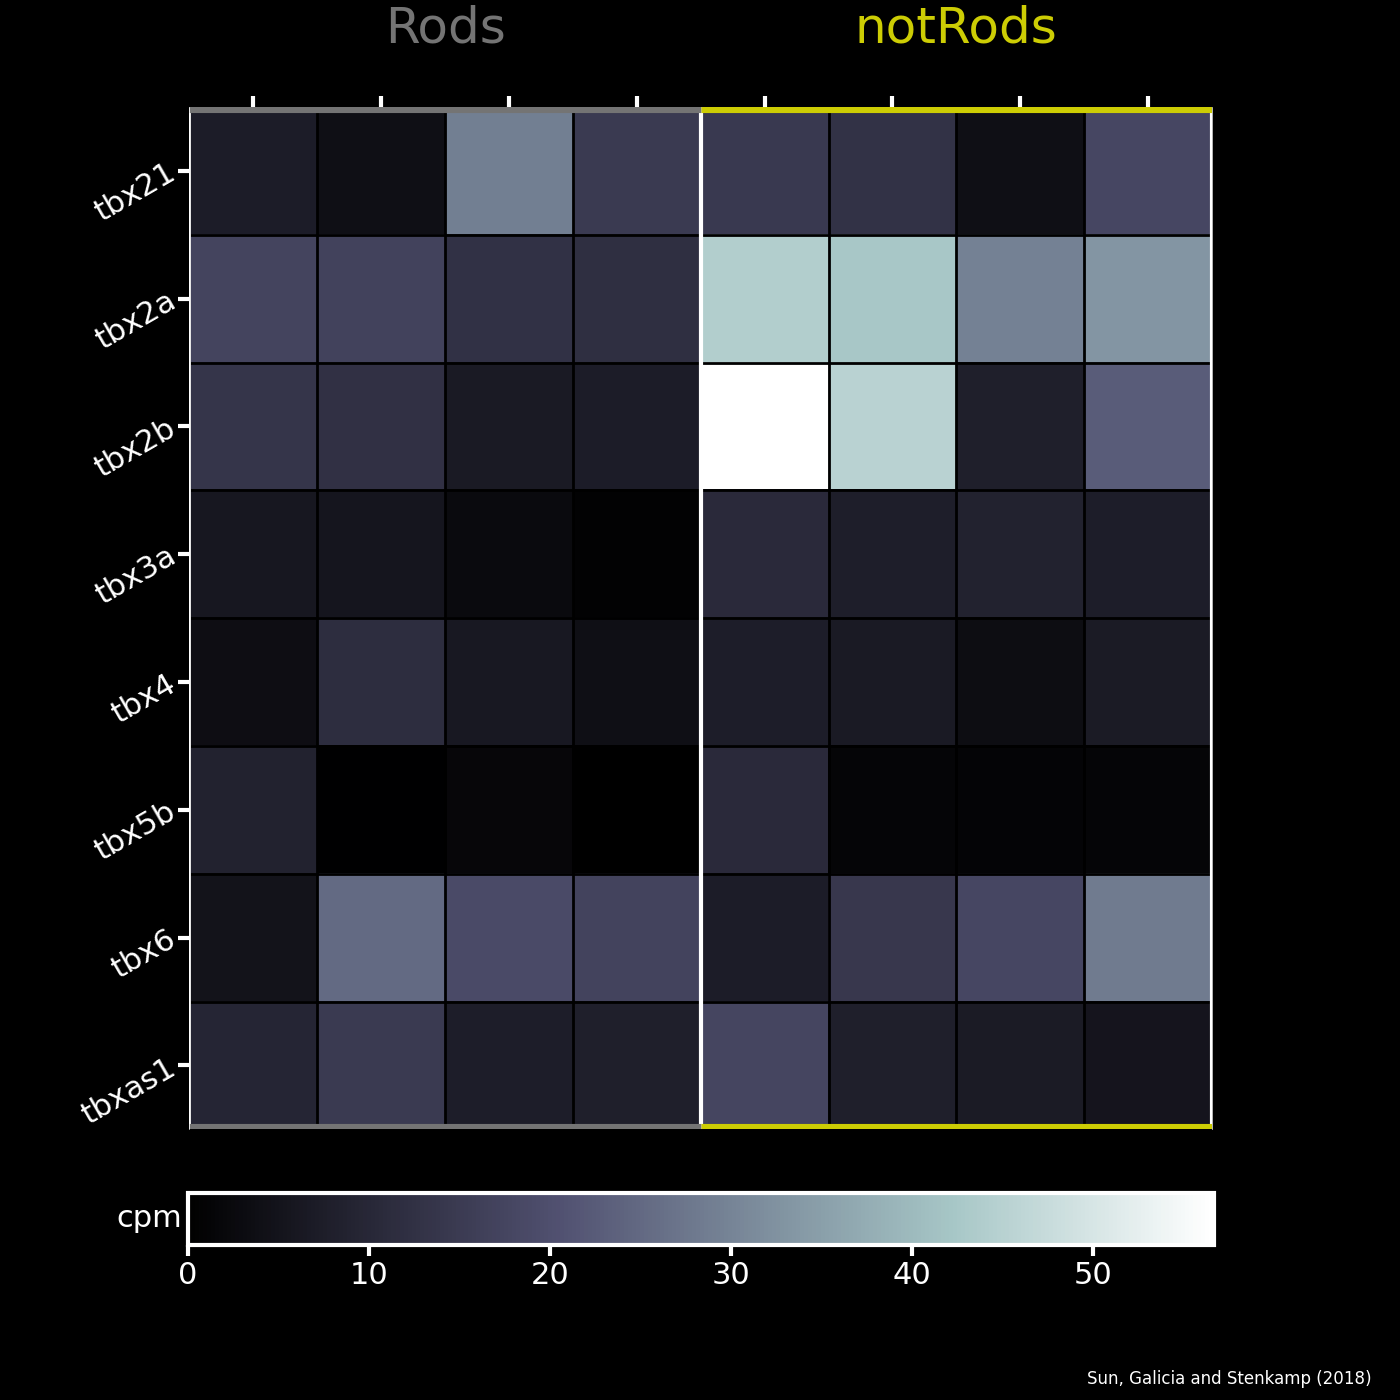

In [11]:
geneSymbol='tbx' # replace geneSymbol here and rerun cell to replot

heatmapData = gf[gf['symbol'].str.startswith(geneSymbol)]
heatmapData = heatmapData.sort_values(by=["symbol"])
heatmapDataO = zfO[zfO['symbol'].str.startswith(geneSymbol)]
heatmapDataO = heatmapDataO.sort_values(by=["symbol"])
heatmapDataH = zfH[zfH['symbol'].str.startswith(geneSymbol)]
heatmapDataH = heatmapDataH.sort_values(by=["symbol"])
heatmapDataS = zfS[zfS['symbol'].str.startswith(geneSymbol)]
heatmapDataS = heatmapDataS.sort_values(by=["symbol"])


fH, axH = plt.subplots(figsize=(20,(heatmapDataO.shape[0])+4))
hm, cb = heatmap(heatmapData, pC=pC, norm=heatmapNormalization)
plt.figtext(0.98,0.015,"Angueyra et al. (2022)", va="center", ha="right", rotation= 0, size=12)
plt.tight_layout()
plt.show()
fH, axHO = plt.subplots(figsize=(16,(heatmapDataO.shape[0])+6))
hmO, cbO = heatmap_Ogawa2021(heatmapDataO, pC=pC, pctPlot=False, norm=heatmapNormalization)
plt.figtext(0.98,0.015,"Ogawa and Corbo (2021)", va="center", ha="right", rotation= 0, size=12)
plt.tight_layout()
plt.show()
fH, axHH = plt.subplots(figsize=(14,(heatmapDataH.shape[0])+6))
hmH, cbH = heatmap_Hoang2020(heatmapDataH, pC=pC, pctPlot=False, norm=heatmapNormalization)
plt.figtext(0.98,0.015,"Hoang et al. (2020)", va="center", ha="right", rotation= 0, size=12)
plt.tight_layout()
plt.show()
fH, axHS = plt.subplots(figsize=(14,(heatmapDataS.shape[0])+6))
hmS, cbS = heatmap_Sun2018(heatmapDataS, pC=pC, norm=heatmapNormalization)
plt.figtext(0.98,0.015,"Sun, Galicia and Stenkamp (2018)", va="center", ha="right", rotation= 0, size=12)
plt.tight_layout()
plt.show()


***
## HeatMap for gene list across studies: provide gene symbol separated by "|" (e.g. '_tbx2a_|_tbx2b_|_foxq2_')<a id='heatMapList_otherStudies'></a>
> retrieves all genes in list and creates heatmap  
***

[Back to Index](#Index)

In [12]:
# display option for normalization
heatmapNormalization = True

Checkbox(value=False, description='Heatmap normalization')

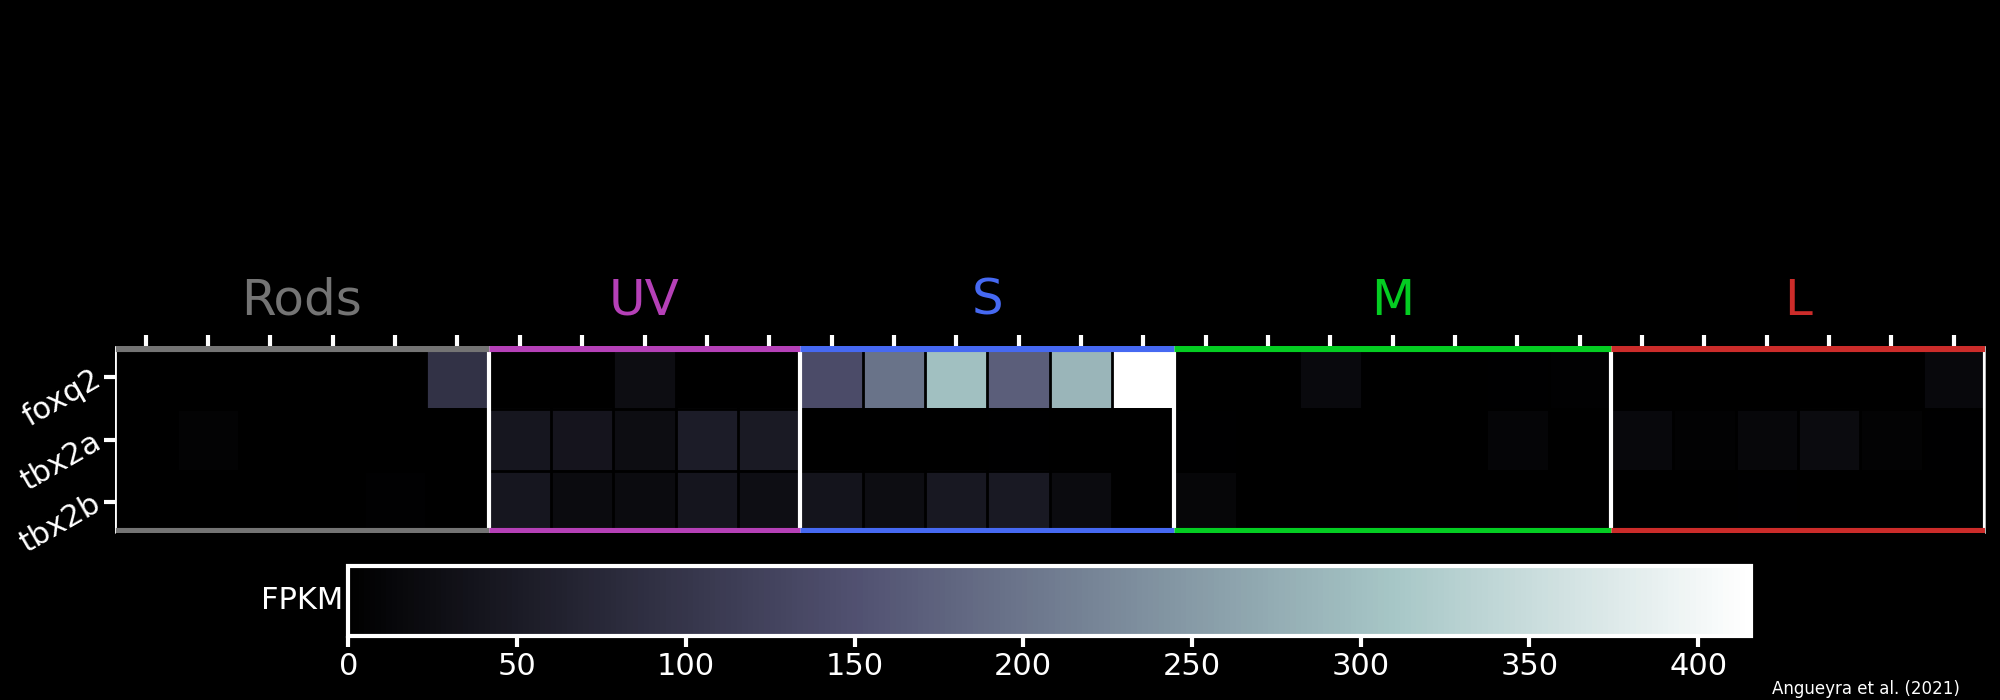

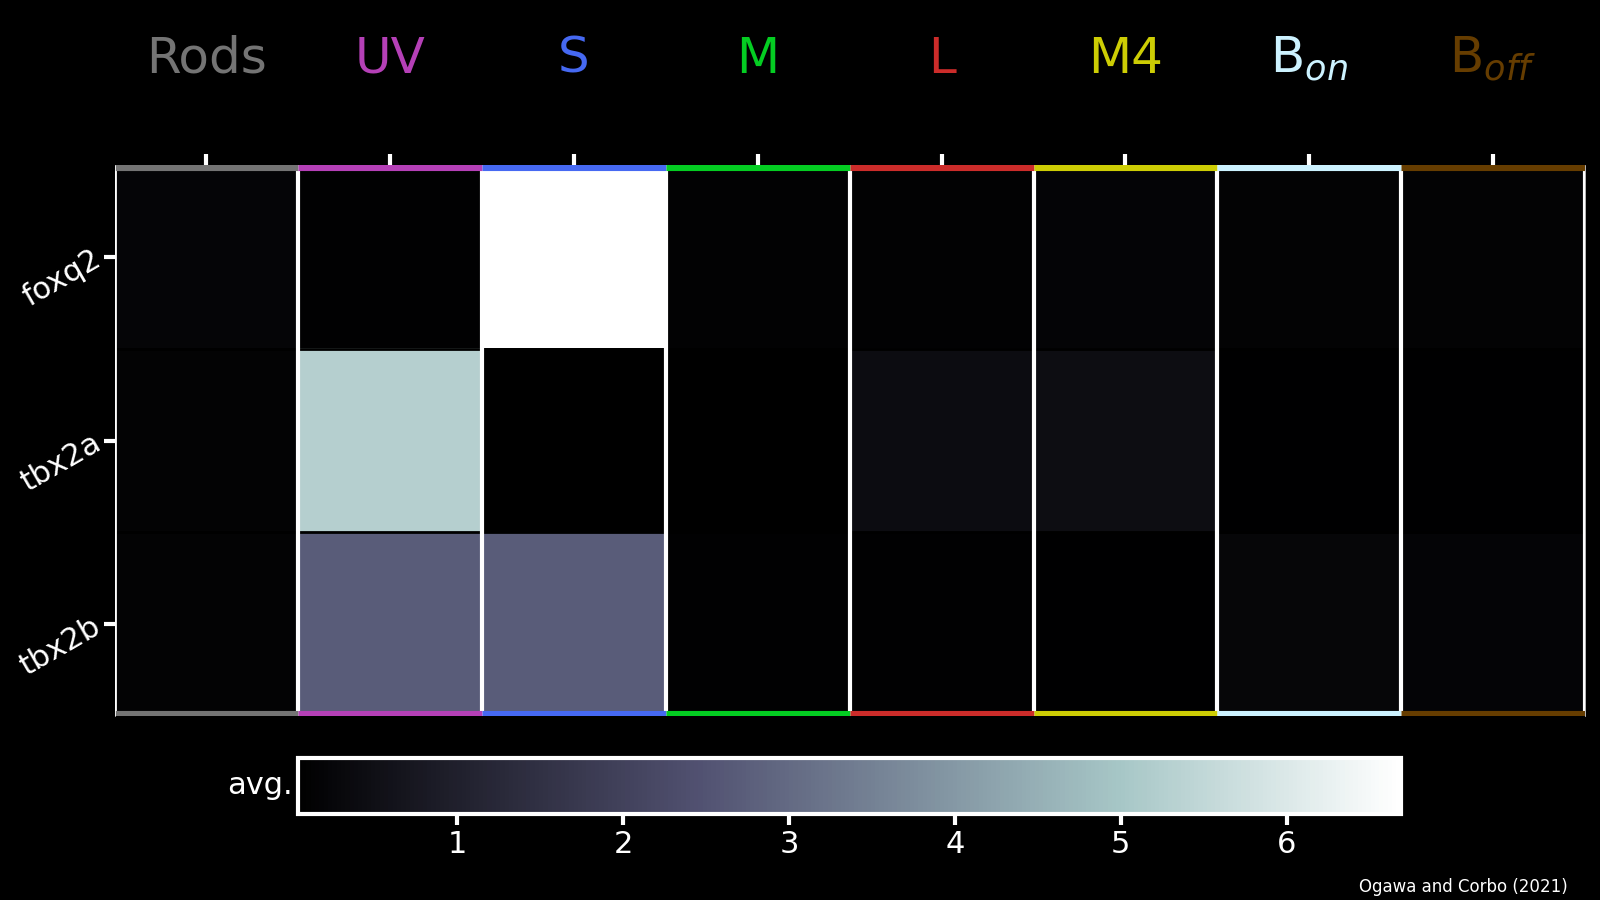

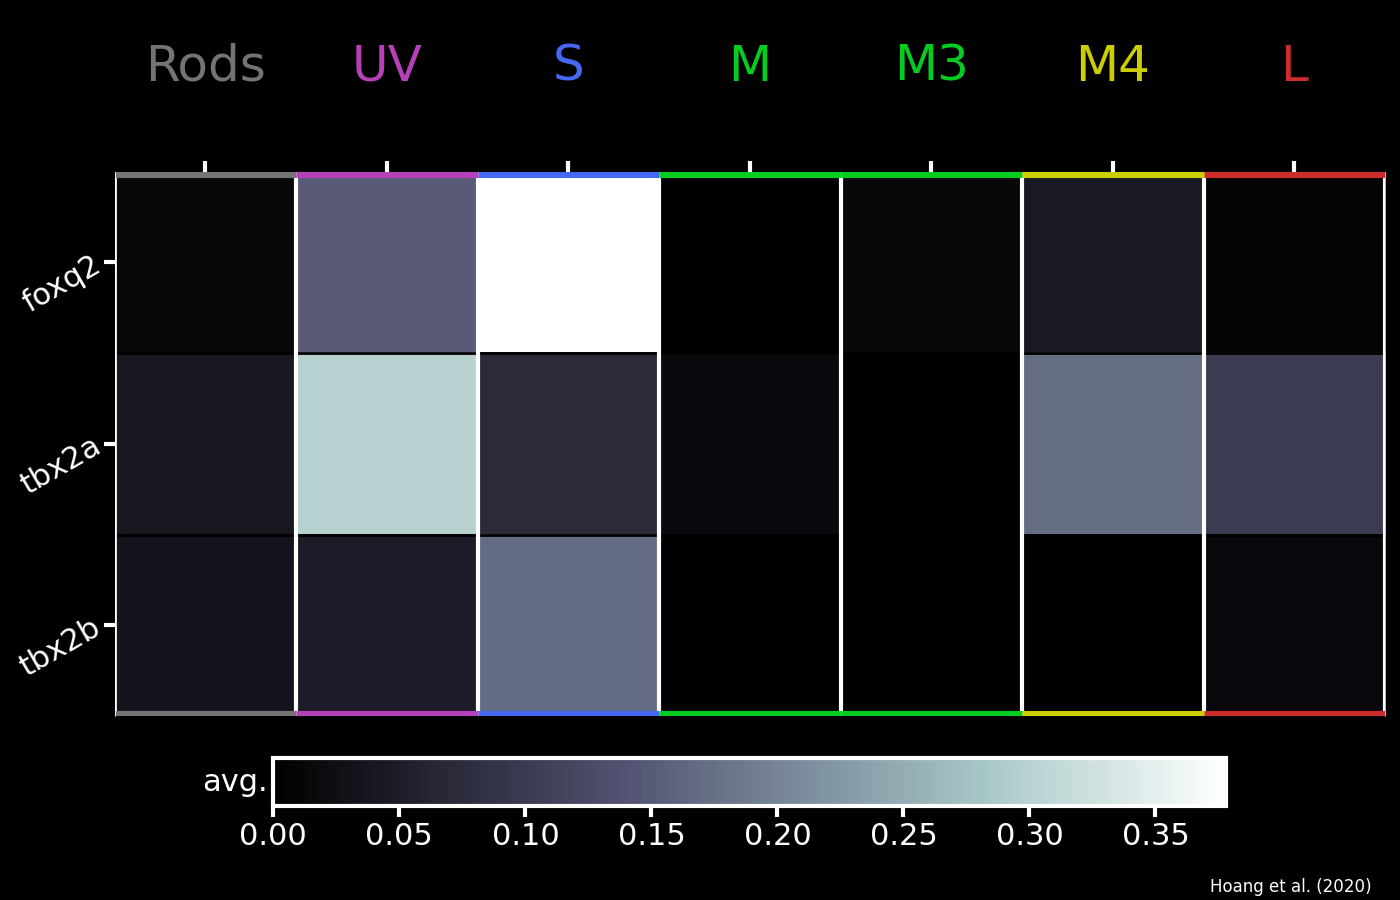

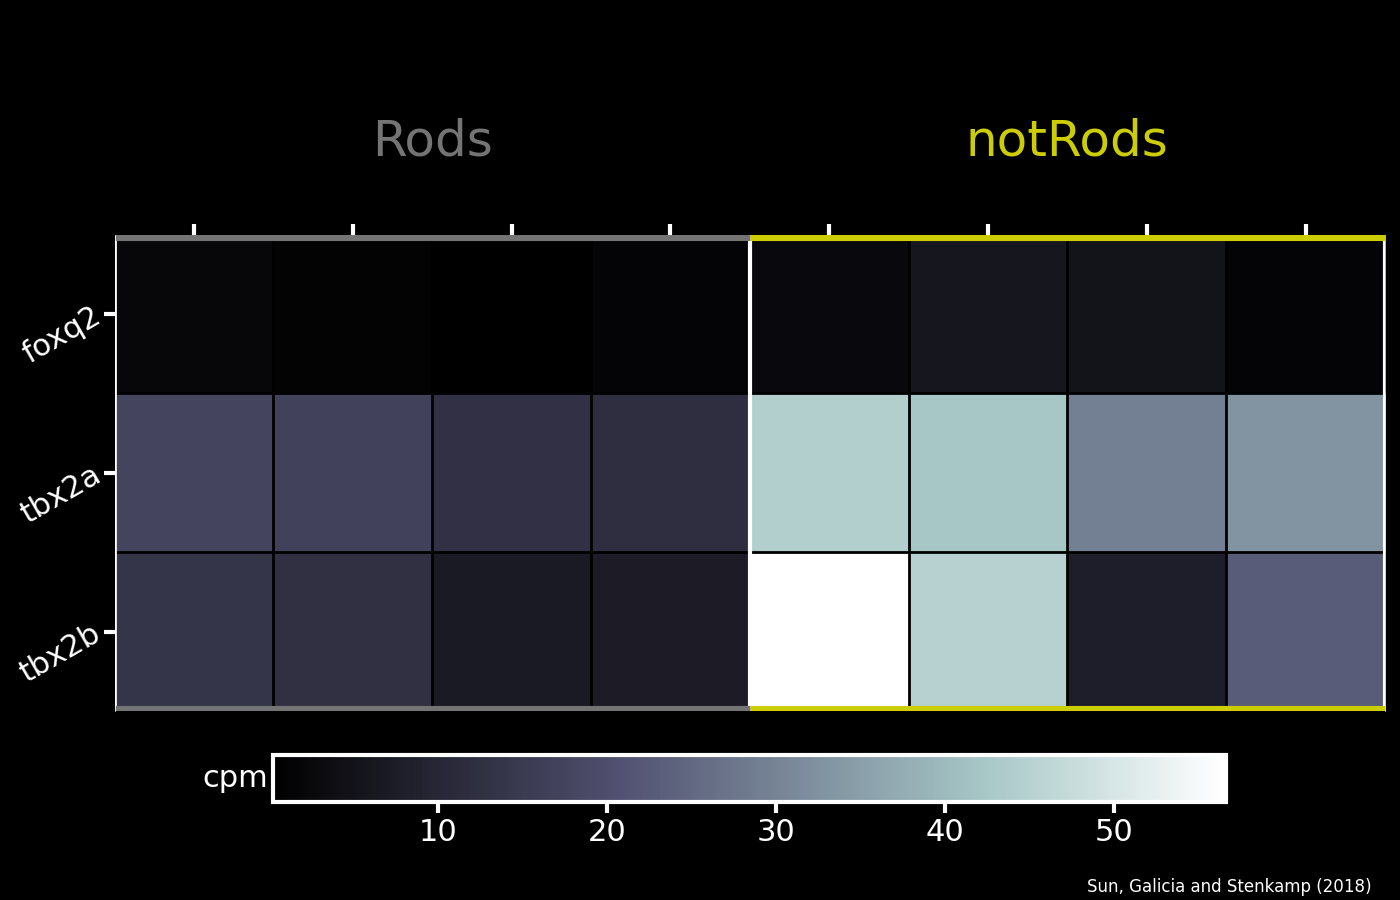

In [13]:
geneSymbol='tbx2a|tbx2b|foxq2' # replace geneSymbol here and rerun cell to replot

heatmapData = gf[gf['symbol'].str.contains(geneSymbol)]
heatmapData = heatmapData.sort_values(by=["symbol"])
heatmapDataO = zfO[zfO['symbol'].str.contains(geneSymbol)]
heatmapDataO = heatmapDataO.sort_values(by=["symbol"])
heatmapDataH = zfH[zfH['symbol'].str.contains(geneSymbol)]
heatmapDataH = heatmapDataH.sort_values(by=["symbol"])
heatmapDataS = zfS[zfS['symbol'].str.contains(geneSymbol)]
heatmapDataS = heatmapDataS.sort_values(by=["symbol"])

fH, axH = plt.subplots(figsize=(20,(heatmapDataO.shape[0])+4))
hm, cb = heatmap(heatmapData, pC=pC, norm=heatmapNormalization)
plt.figtext(0.98,0.015,"Angueyra et al. (2022)", va="center", ha="right", rotation= 0, size=12)
plt.tight_layout()
plt.show()
fH, axHO = plt.subplots(figsize=(16,(heatmapDataO.shape[0])+6))
hmO, cbO = heatmap_Ogawa2021(heatmapDataO, pC=pC, pctPlot=False, norm=heatmapNormalization)
plt.figtext(0.98,0.015,"Ogawa and Corbo (2021)", va="center", ha="right", rotation= 0, size=12)
plt.tight_layout()
plt.show()
fH, axHH = plt.subplots(figsize=(14,(heatmapDataH.shape[0])+6))
hmH, cbH = heatmap_Hoang2020(heatmapDataH, pC=pC, pctPlot=False, norm=heatmapNormalization)
plt.figtext(0.98,0.015,"Hoang et al. (2020)", va="center", ha="right", rotation= 0, size=12)
plt.tight_layout()
plt.show()
fH, axHS = plt.subplots(figsize=(14,(heatmapDataS.shape[0])+6))
hmS, cbS = heatmap_Sun2018(heatmapDataS, pC=pC, norm=heatmapNormalization)
plt.figtext(0.98,0.015,"Sun, Galicia and Stenkamp (2018)", va="center", ha="right", rotation= 0, size=12)
plt.tight_layout()
plt.show()